## <b>Pengujian Performance antara Apriori dan FPGrowth

### Import Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import time

### <b>Read Datasets

In [2]:
data = pd.read_csv("../datasets/ind.csv", sep = ";")
data.head(20)

C:\Users\Budi\AppData\Local\Temp\ipykernel_7832\1475147716.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../datasets/ind.csv", sep = ";")


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,01.12.2010 08:26,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,01.12.2010 08:26,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,01.12.2010 08:34,"1,69",13047.0,United Kingdom


### Cleansing Datasets

In [3]:
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [4]:
data = data.dropna(subset=["Itemname"])

In [5]:
data = data.fillna(0)

### Membuat Pivot Table

In [6]:
basket = data.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Mengubah data kuantitas menjadi 1 / 0

In [7]:
#mengubah dari 0,0 menjadi 0
def one_hot_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(one_hot_encoding)
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
freq_items=apriori(basket,min_support=0.02,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)
res1.sort_values("confidence",ascending=False, inplace=True)
res1

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
153,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659
152,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029936,0.050124,0.025482,0.851240,16.982778,0.023982,6.385280
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036418,0.048243,0.029936,0.822011,17.038810,0.028179,5.347273
160,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.025433,0.102128,0.020386,0.801556,7.848573,0.017789,4.524572
138,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.036418,0.050124,0.028204,0.774457,15.450905,0.026378,4.211500
...,...,...,...,...,...,...,...,...,...
71,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SKULLS),0.102128,0.034785,0.020435,0.200097,5.752430,0.016883,1.206665
161,(JUMBO BAG RED RETROSPOT),"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",0.102128,0.025433,0.020386,0.199612,7.848573,0.017789,1.217619
43,(JUMBO BAG RED RETROSPOT),(JUMBO BAG ALPHABET),0.102128,0.043790,0.020336,0.199128,4.547316,0.015864,1.193961
131,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD),0.108956,0.060960,0.020336,0.186649,3.061823,0.013695,1.154532


### Mencari Frequent Itemsets dengan Apriori dan FPGrowth

#### Frequent Itemsets dengan Apriori

In [9]:
freq_items=apriori(basket,min_support=0.02,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)
res1

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.063286,0.039485,0.021524,0.340109,8.613549,0.019025,1.455567
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.039485,0.063286,0.021524,0.545113,8.613549,0.019025,2.059224
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.037556,0.047848,0.020336,0.541502,11.317223,0.018540,2.076677
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.047848,0.037556,0.020336,0.425026,11.317223,0.018540,1.673891
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047848,0.050816,0.031321,0.654602,12.881698,0.028890,2.748085
...,...,...,...,...,...,...,...,...,...
159,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",(JUMBO STORAGE BAG SUKI),0.040524,0.058288,0.020386,0.503053,8.630468,0.018024,1.894993
160,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",(JUMBO BAG PINK POLKADOT),0.035675,0.059921,0.020386,0.571429,9.536393,0.018248,2.193518
161,(JUMBO BAG PINK POLKADOT),"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",0.059921,0.035675,0.020386,0.340215,9.536393,0.018248,1.461573
162,(JUMBO STORAGE BAG SUKI),"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",0.058288,0.040524,0.020386,0.349745,8.630468,0.018024,1.475538


In [10]:
freq_items=apriori(basket,min_support=0.03,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)
res1

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047848,0.050816,0.031321,0.654602,12.881698,0.028890,2.748085
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050816,0.047848,0.031321,0.616358,12.881698,0.028890,2.481879
2,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.050124,0.048243,0.036170,0.721619,14.957866,0.033752,3.418899
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.048243,0.050124,0.036170,0.749744,14.957866,0.033752,3.795612
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.622110,0.034405,2.773784
5,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.622110,0.034405,1.558493
6,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.057694,0.102128,0.033449,0.579760,5.676815,0.027557,2.136570
7,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.102128,0.057694,0.033449,0.327519,5.676815,0.027557,1.401239
8,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.058288,0.102128,0.035675,0.612054,5.993032,0.029723,2.314428
9,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102128,0.058288,0.035675,0.349322,5.993032,0.029723,1.447277


In [11]:
freq_items=apriori(basket,min_support=0.04,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)
res1

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.62211,0.034405,2.773784
1,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.62211,0.034405,1.558493


In [12]:
freq_items=apriori(basket,min_support=0.015,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)
res1

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041613,0.039485,0.016724,0.401902,10.178508,0.015081,1.605950
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.039485,0.041613,0.016724,0.423559,10.178508,0.015081,1.662593
2,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.063286,0.039485,0.021524,0.340109,8.613549,0.019025,1.455567
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.039485,0.063286,0.021524,0.545113,8.613549,0.019025,2.059224
4,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.027759,0.047848,0.016329,0.588235,12.293935,0.015000,2.312370
...,...,...,...,...,...,...,...,...,...
519,"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL...",(WOODLAND CHARLOTTE BAG),0.023850,0.040920,0.016081,0.674274,16.477720,0.015105,2.944436
520,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",(RED RETROSPOT CHARLOTTE BAG),0.019990,0.050866,0.016081,0.804455,15.815218,0.015064,4.853800
521,(RED RETROSPOT CHARLOTTE BAG),"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",0.050866,0.019990,0.016081,0.316148,15.815218,0.015064,1.433073
522,(WOODLAND CHARLOTTE BAG),"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL...",0.040920,0.023850,0.016081,0.392987,16.477720,0.015105,1.608120


#### Frequent Itemsets dengan FPGrowth

In [13]:
#running the fpgrowth algorithm
res=fpgrowth(basket,min_support=0.02,use_colnames=True)
res2 = association_rules(res,  metric="lift", min_threshold=1)
res2

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JAM MAKING SET WITH JARS),(JAM MAKING SET PRINTED),0.053884,0.055220,0.022365,0.415060,7.516448,0.019390,1.615173
1,(JAM MAKING SET PRINTED),(JAM MAKING SET WITH JARS),0.055220,0.053884,0.022365,0.405018,7.516448,0.019390,1.590158
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047848,0.050816,0.031321,0.654602,12.881698,0.028890,2.748085
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050816,0.047848,0.031321,0.616358,12.881698,0.028890,2.481879
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.037556,0.050816,0.022464,0.598155,11.770908,0.020556,2.362067
...,...,...,...,...,...,...,...,...,...
159,(PARTY BUNTING),(SPOTTY BUNTING),0.081940,0.055121,0.023404,0.285628,5.181815,0.018888,1.322671
160,(JUMBO BAG VINTAGE LEAF),(JUMBO BAG RED RETROSPOT),0.042454,0.102128,0.020782,0.489510,4.793124,0.016446,1.758846
161,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE LEAF),0.102128,0.042454,0.020782,0.203488,4.793124,0.016446,1.202174
162,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.044780,0.037308,0.026917,0.601105,16.111845,0.025247,2.413396


In [14]:
res=fpgrowth(basket,min_support=0.03,use_colnames=True)
res2 = association_rules(res,  metric="lift", min_threshold=1)
res2

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047848,0.050816,0.031321,0.654602,12.881698,0.028890,2.748085
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050816,0.047848,0.031321,0.616358,12.881698,0.028890,2.481879
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.622110,0.034405,2.773784
3,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.622110,0.034405,1.558493
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.058288,0.102128,0.035675,0.612054,5.993032,0.029723,2.314428
5,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102128,0.058288,0.035675,0.349322,5.993032,0.029723,1.447277
6,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.057694,0.102128,0.033449,0.579760,5.676815,0.027557,2.136570
7,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.102128,0.057694,0.033449,0.327519,5.676815,0.027557,1.401239
8,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.076249,0.062345,0.031272,0.410123,6.578247,0.026518,1.589577
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.062345,0.076249,0.031272,0.501587,6.578247,0.026518,1.853385


In [15]:
res=fpgrowth(basket,min_support=0.04,use_colnames=True)
res2 = association_rules(res,  metric="lift", min_threshold=1)
res2

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.62211,0.034405,2.773784
1,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.62211,0.034405,1.558493


In [16]:
res=fpgrowth(basket,min_support=0.015,use_colnames=True)
res2 = association_rules(res,  metric="lift", min_threshold=1)
res2

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.070807,0.108956,0.015438,0.218029,2.001078,0.007723,1.139485
1,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.108956,0.070807,0.015438,0.141689,2.001078,0.007723,1.082584
2,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.021029,0.020435,0.015042,0.715294,35.002649,0.014612,3.440619
3,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.020435,0.021029,0.015042,0.736077,35.002649,0.014612,3.709311
4,(JAM MAKING SET WITH JARS),(JAM MAKING SET PRINTED),0.053884,0.055220,0.022365,0.415060,7.516448,0.019390,1.615173
...,...,...,...,...,...,...,...,...,...
519,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.037308,0.044780,0.026917,0.721485,16.111845,0.025247,3.429695
520,(JUMBO BAG VINTAGE CHRISTMAS),(JUMBO BAG 50'S CHRISTMAS),0.023256,0.035082,0.015784,0.678723,19.346968,0.014968,3.003388
521,(JUMBO BAG 50'S CHRISTMAS),(JUMBO BAG VINTAGE CHRISTMAS),0.035082,0.023256,0.015784,0.449929,19.346968,0.014968,1.775671
522,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE DOILY),0.102128,0.034488,0.017318,0.169574,4.916906,0.013796,1.162670


### Testing performance - Mencari perbedaan waktu eksekusi

#### Support = 0.015

In [17]:
start_time = time.time()

# Generate frequent itemsets and rules
res=fpgrowth(basket,min_support=0.015,use_colnames=True)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 11.26 seconds


In [18]:
start_time = time.time()

# Generate frequent itemsets and rules
res=apriori(basket,min_support=0.015,use_colnames=True)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 182.77 seconds


In [19]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=fpgrowth(basket,min_support=0.04,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 6.12 seconds


#### Support = 0.02

In [20]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=fpgrowth(basket,min_support=0.02,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 8.11 seconds


In [21]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=apriori(basket,min_support=0.02,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 11.63 seconds


#### Support = 0.03

In [22]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=fpgrowth(basket,min_support=0.03,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 3.35 seconds


In [23]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=apriori(basket,min_support=0.03,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 2.59 seconds


#### Support = 0.04

In [24]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=fpgrowth(basket,min_support=0.04,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 3.89 seconds


In [25]:
start_time = time.time()

# Generate frequent itemsets and rules
freq_items=apriori(basket,min_support=0.04,use_colnames=True)
res1 = association_rules(freq_items,  metric="lift", min_threshold=1)

# Record end time
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing time: {:.2f} seconds".format(testing_time))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Testing time: 1.84 seconds


In [12]:
import time
l=[0.015,0.02,0.03,0.04]
t=[]
for i in l:
    t1=time.time()
    apriori(basket,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python31

In [13]:
t_2=[]
for i in l:
    t1=time.time()
    fpgrowth(basket,min_support=i,use_colnames=True)
    t2=time.time()
    t_2.append((t2-t1))

c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Budi\AppData\Local\Programs\Python\Python31

Text(0, 0.5, 'Run Time in ms')

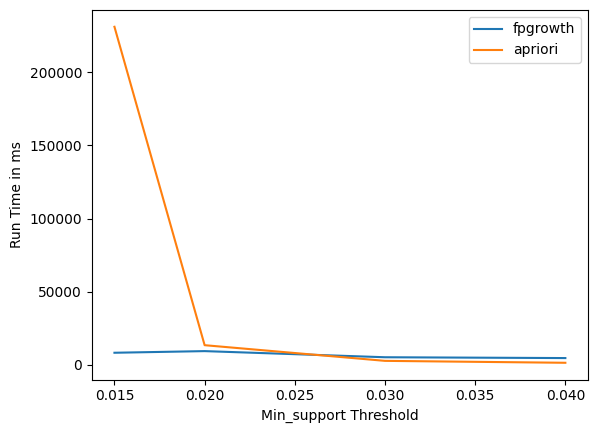

In [16]:
sns.lineplot(x=l,y=t_2,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")